# Import libs

In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append('..')
from eFlow.ClusterMaster import *
from eFlow.DataFrameTypes import *
from eFlow.DataAnalysis import *
from eFlow.DataCleaner import *
from xgboost import XGBClassifier
import ipython_blocking
from pivottablejs import pivot_ui

In [2]:
%matplotlib notebook
%matplotlib inline

### Be sure to run the following

## Declare Worflow Variables

#### (This should be the only place you should have to declare anything)

In [3]:
dataset_path = "Datasets/titanic_train.csv"
target_col = "Survived"
parent_project_name = "Pre processing"

# Import dataset

In [4]:
df = pd.read_csv(dataset_path)
display(df.shape)
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Interaction tool for dataframes

### Explore the data

In [5]:
pivot_ui(df,
         outfile_path='Piviot_Table_JS.html')

## Remove Un-Wanted Columns

### Do not remove nans yet, let the datacleaner do it's job

In [6]:
df.drop(columns=["Name",
                 "Ticket",
                 "PassengerId"],
        inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Basic Feature manipulation

### Change cabin column to have the level on the ship

In [7]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]

## Change Feature Data types

### Look at data types

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Make given data type changes

In [9]:
df["Pclass"] = df["Pclass"].replace(1, np.nan)

### Final look at data types

In [10]:
df.dtypes

Survived      int64
Pclass      float64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Set up DataFrameTypes

In [11]:
df_features = DataFrameTypes(df,
                             target_col=target_col)

Categorical Features: {'Sex', 'Cabin', 'Embarked'}

Possible One hot encoded feature names: {'Sex': ['Sex_male', 'Sex_female'], 'Cabin': ['Cabin_F', 'Cabin_G', 'Cabin_A', 'Cabin_C', 'Cabin_T', 'Cabin_E', 'Cabin_B', 'Cabin_D'], 'Embarked': ['Embarked_Q', 'Embarked_S', 'Embarked_C']}

------------------------------------------------------------------------------------------
Numerical Features: {'Parch', 'SibSp', 'Fare', 'Survived', 'Pclass', 'Age'}

Integer Features: {'Survived', 'SibSp', 'Parch', 'Pclass'}

Float Features: {'Age', 'Fare'}

Target Feature: Survived



## Skim through Value Counts

In [12]:
for col in df.columns:
    if col not in df_features.get_float_features() and len(np.unique(df[col].dropna().values)) <= 12:
        display(df[col].value_counts())
        print("***" * 4 + "\n\n")

0    549
1    342
Name: Survived, dtype: int64

************




3.0    491
2.0    184
Name: Pclass, dtype: int64

************




male      577
female    314
Name: Sex, dtype: int64

************




0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

************




0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

************




C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

************




S    644
C    168
Q     77
Name: Embarked, dtype: int64

************




### Perform quick analysis

In [13]:
# analysis_obj = DataAnalysis(df,
#                             df_features,
#                             project_name=parent_project_name + "/" + "General Analysis")

## Data Cleaning

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Pclass,216,24.2
Age,177,19.9
Embarked,2,0.2


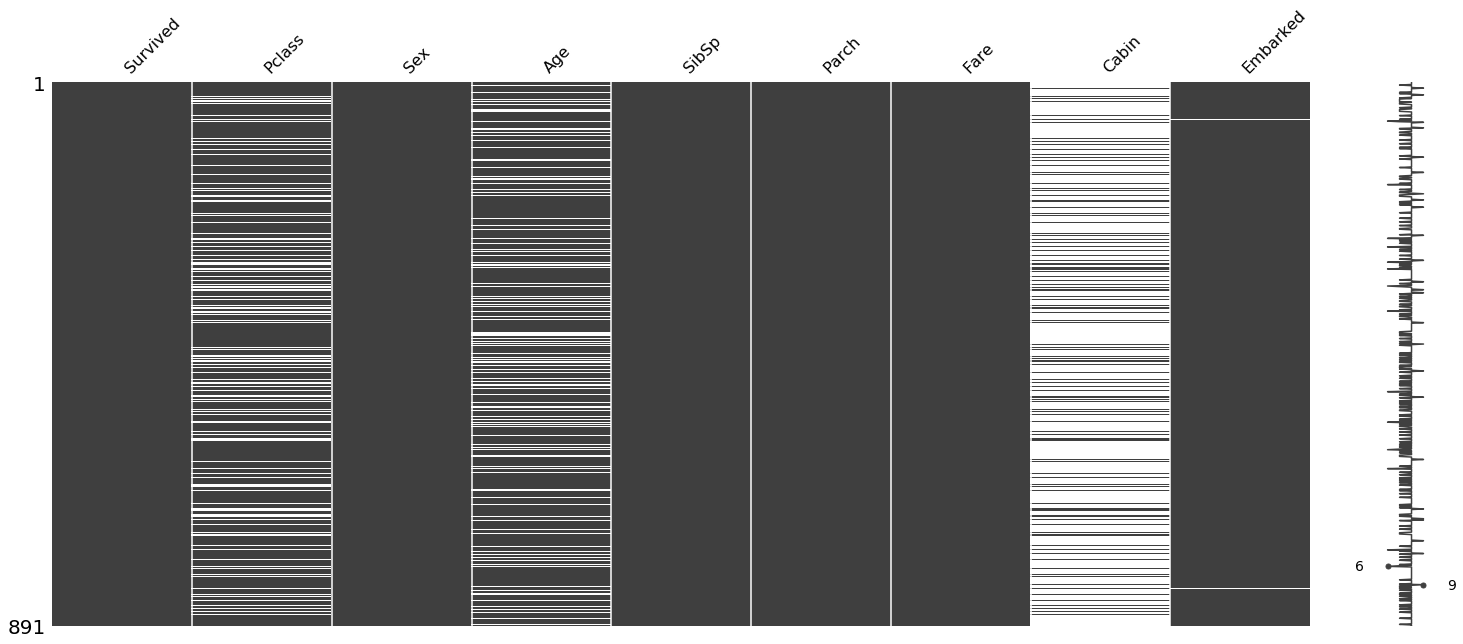

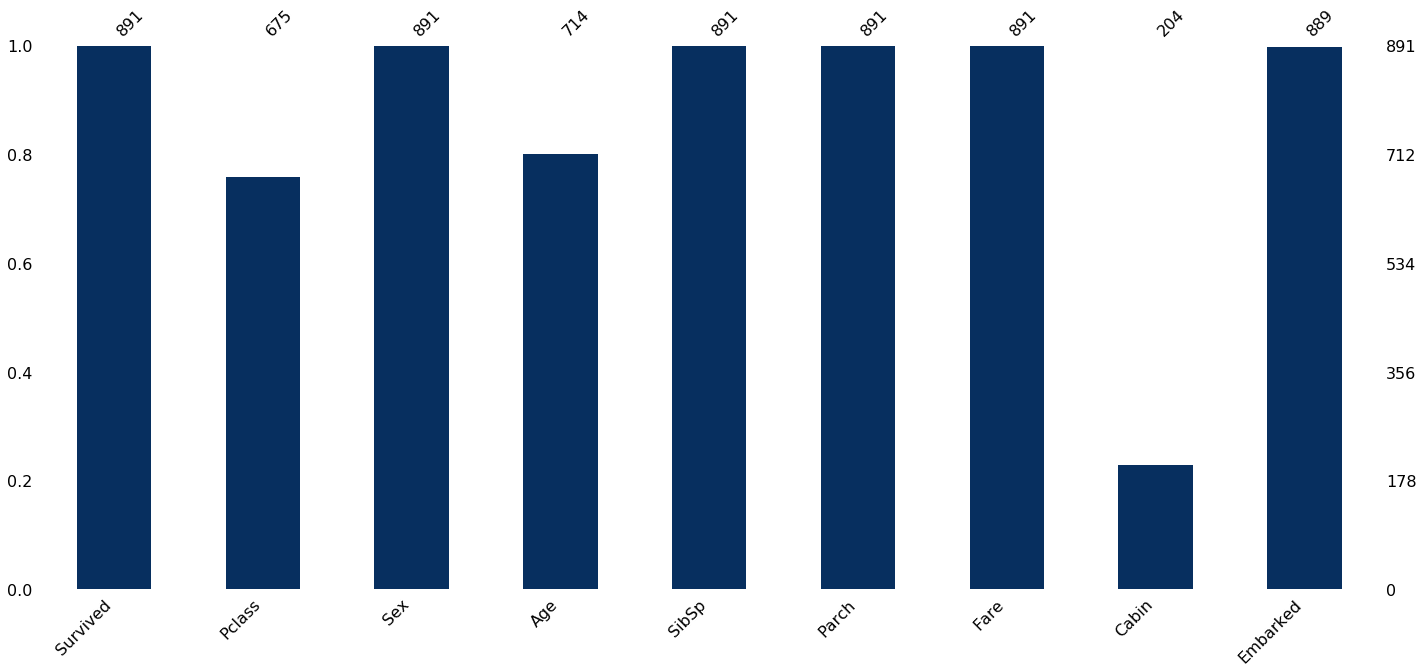

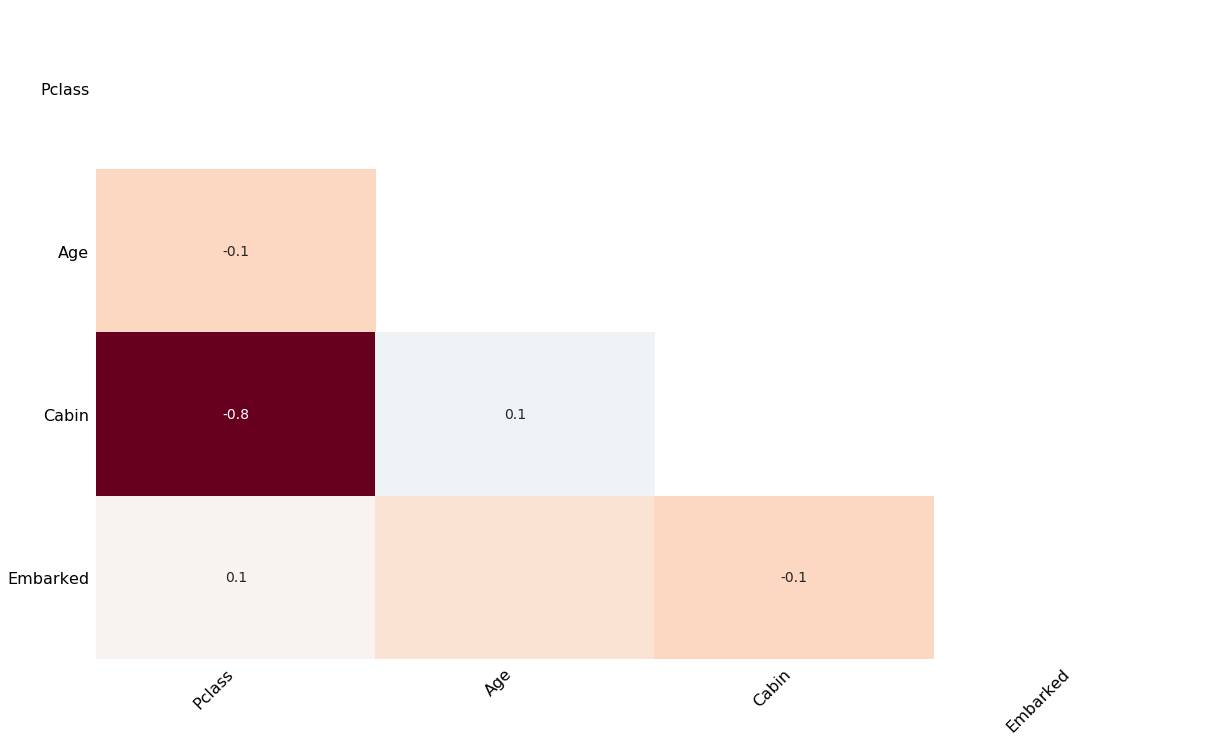

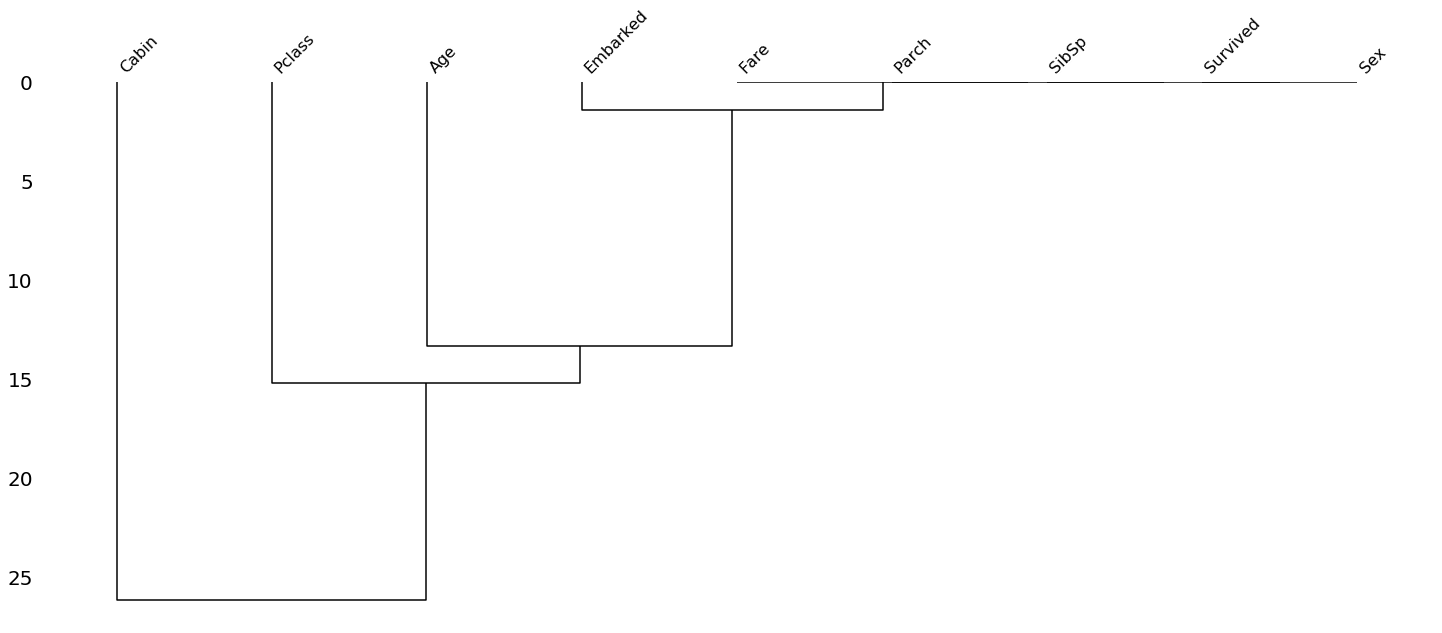

/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eFlow Created Data/Pre processing/Data Cleaning/
Hit


In [14]:
data_cleaner = DataCleaner(df,
                           project_name=parent_project_name + "/" + "Data Cleaning",
                           missing_data_visuals=True)

In [ ]:
data_cleaner.init_json_file_name("test.json")

In [15]:
data_cleaner.data_cleaning_widget(df,
                                  df_features)

Text(value='Default Data Cleaning', description='File Name:', layout=Layout(left='590px'), placeholder='Replac…

interactive(children=(Select(description='Features', layout=Layout(height='175px', width='50%'), options=('Pcl…

Button(description='Create JSON File from options', layout=Layout(bottom='5px', left='100px', width='40%'), st…

In [16]:
from collections import deque
queue = deque([])
queue.append("Eric")
queue.append(("Eric","Test"))
for i in queue:
    print(i)

Eric
('Eric', 'Test')


In [19]:
data_cleaner.get_last_saved_json_file_path()

'/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eFlow Created Data/JSON File Dump/Data Cleaning/Default Data Cleaning.json'

In [20]:
data_cleaner.data_cleaning_with_json_file(df,
                                          data_cleaner.get_last_saved_json_file_path())

Fill nan by distribution
the minimum
Replace nan with 2.0 on feature: Pclass
************************************************************

__ignore_feature
Ignoring Feature:  Age
************************************************************

__ignore_feature
Ignoring Feature:  Cabin
************************************************************

__ignore_feature
Ignoring Feature:  Embarked
************************************************************



In [ ]:
from scipy import stats
df.reset_index(drop=True)
z_score_return = stats.zscore(((df["Age"].dropna())))
df["Age"].dropna()[(z_score_return >= -2) & (z_score_return <= 2)]

In [ ]:
from impyute.imputation.cs import mice

a = df["Age"].tolist()
# start the MICE training
imputed_training=mice(df.values)

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin','Embarked'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df, num_epochs=200)




In [ ]:
imputed_training=mice(df[df_features.get_numerical_features()].values)
imputed_training[0]

In [ ]:
!pip install datawig